11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


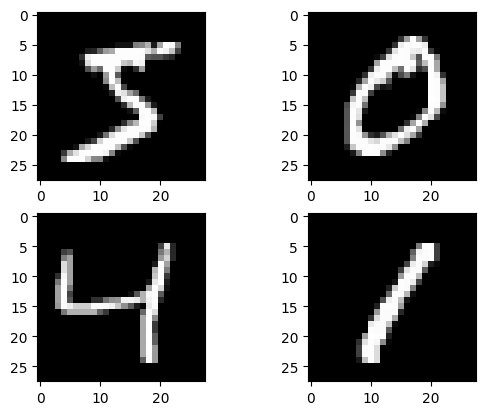

Epoch 1/2
300/300 [==============================] - 12s 37ms/step - loss: 0.0419 - val_loss: 0.0199
Epoch 2/2
313/313 [==============================] - 1s 3ms/step
Test Images


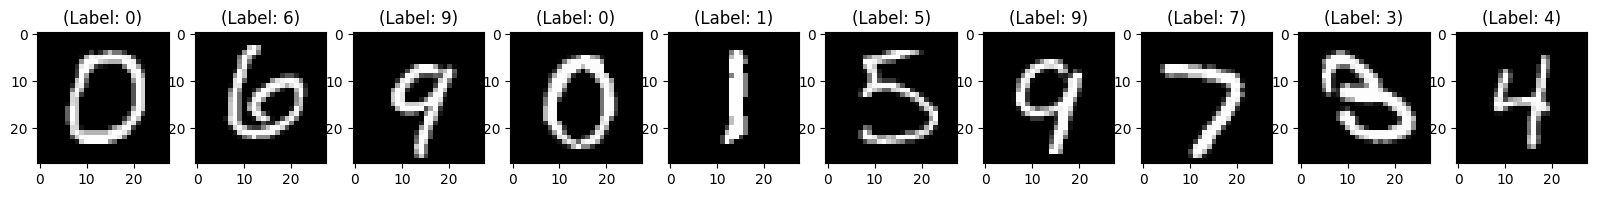

Test Images with Noise


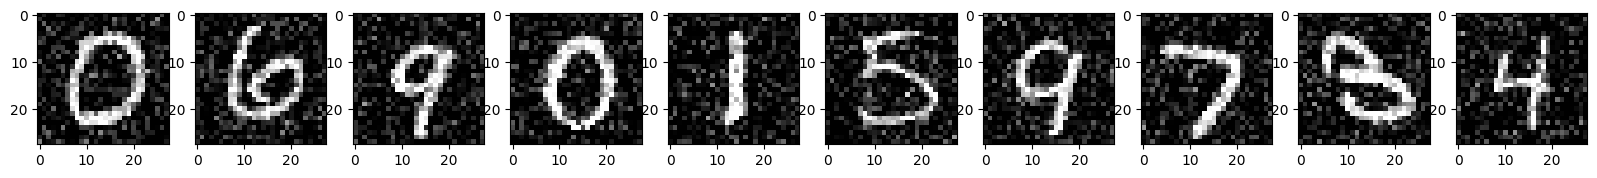

Reconstruction of Noisy Test Images


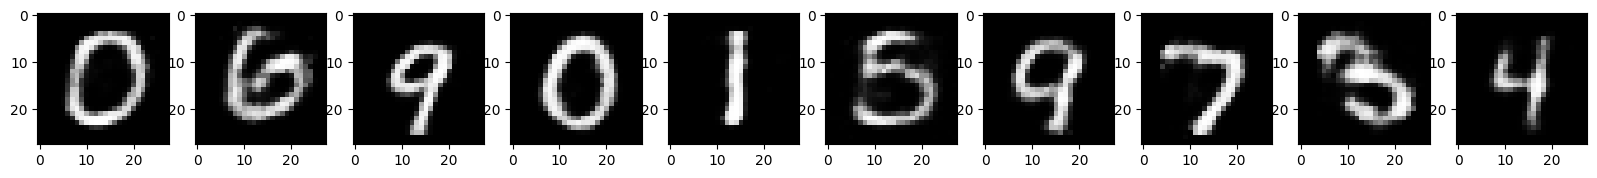

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check the shape of the training and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Visualize some of the training samples
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

# Flatten the image data and normalize pixel values
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train /= 255
X_test /= 255

# Add noise to the data
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Create a Sequential model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

# Final evaluation of the model
pred = model.predict(x_test_noisy)
pred = pred * 255  # Rescale the predicted values

# Reshape test data and ground truth
X_test = X_test.reshape((10000, 28, 28)) * 255
x_test_noisy = x_test_noisy.reshape((-1, 28, 28)) * 255

# Visualize the test images
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()

# Visualize the test images with noise
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i, :, :], cmap='gray')
plt.show()

# Visualize the reconstructed images
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(pred[i].reshape(28, 28), cmap='gray')
plt.show()
